In [19]:
def get_knot_hash(text):
    
    def compute_hash(array, num=16):
        new_hash = []
        idx = 0
        width = 16
        for _ in range(num):
            result = 0
            for item in array[idx:idx+width]:
                result ^= item
            new_hash.append(result)
            idx += width
        return new_hash

    def pick_array(array, index, length):
        new_list = []
        while len(new_list)<length:
            index = index % len(array)
            new_list.append(array[index])
            index += 1
        return new_list

    def put_array(array, index, to_reverse):
        while to_reverse:
            index = index % len(array)
            array[index] = to_reverse.pop()
            index += 1
        return array
    
    lengths = [ord(x) for x in text.strip()]
    lengths += [17, 31, 73, 47, 23]
    numbers = list(range(256))

    skip_size = 0
    index = 0
    n_rounds = 64

    for round in range(n_rounds):
        for item in lengths:
            to_reverse = pick_array(numbers, index, item)
            numbers = put_array(numbers, index, to_reverse)
            index = index + item + skip_size
            skip_size += 1

    hash = compute_hash(numbers)
    hex = ['{:02x}'.format(x) for x in hash]
    return ''.join(hex)

In [47]:
import requests

text = 'flqrgnkx'
text = requests.get('https://aoc.intae.it/14').text.strip()
total_string = ''
total_array = []
for row in range(128):
    bin_string = ''
    bin_array = []
    for char in get_knot_hash('{}-{}'.format(text, row)):
        bin_string += "{:04b}".format(int(char,16))
        bin_array += [int(x) for x in "{:04b}".format(int(char,16))]
    total_array.append(bin_array)
    total_string += bin_string + '\n'
output_string = total_string.replace('1', '#').replace('0', '.')
print(output_string.count('#'))

8292


(0.0, 1.0, 0.0, 1.0)

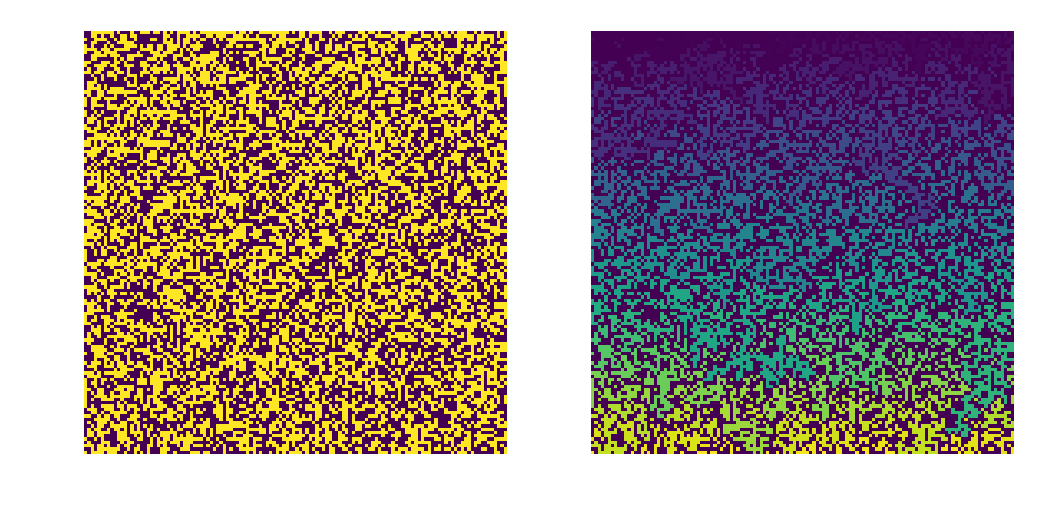

In [86]:
%matplotlib inline
import numpy as np
from scipy.ndimage import label
from matplotlib import pyplot as plt

array = np.array(total_array)

region_array, n_regions = label(array)

fig, ax=plt.subplots(1, 2, dpi=200)
ax[0].imshow(array, extent=[0, 1, 0, 1])
ax[1].imshow(region_array, extent=[0, 1, 0, 1])
ax[0].axis('off')
ax[1].axis('off')